In [50]:
# Import necessary packages
from matplotlib.axes._axes import _log as matplotlib_axes_logger
import os
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import earthpy as et

# Handle date time conversions between pandas and matplotlib
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# Dealing with error thrown by one of the plots
matplotlib_axes_logger.setLevel('ERROR')
import warnings
warnings.filterwarnings('ignore')


# Adjust font size and style of all plots in notebook with seaborn
sns.set(font_scale=1.5, style="whitegrid")

In [51]:
# Download the data
#data = et.data.get_data('colorado-flood')

# Set working directory
os.chdir(os.path.join(et.io.HOME, "D:\STUDIA\Programowanie\EarthDataScience\DataForEarthOpenSourcePython\Chapter1"))

In [52]:
# Define relative path to the data
file_path = os.path.join("DATA",
                         "precipitation",
                         "805325-precip-daily-2003-2013.csv")

# Import the file as a pandas dataframe
boulder_precip_2003_2013 = pd.read_csv(file_path)
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,DATE,HPCP,Measurement Flag,Quality Flag
0,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030101 01:00,0.0,g,
1,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030201 01:00,0.0,g,
2,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 19:00,0.2,,
3,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030202 22:00,0.1,,
4,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,20030203 02:00,0.1,,


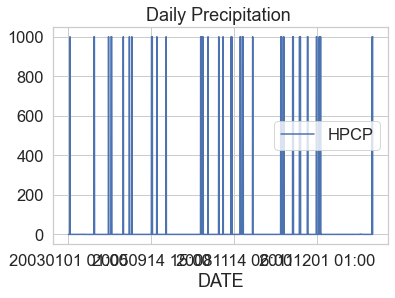

In [53]:
boulder_precip_2003_2013.plot(x="DATE",
                              y="HPCP",
                              title="Daily Precipitation ")
plt.show()

In [54]:
# Look at the range of values in the data - specifically the HPCP column
boulder_precip_2003_2013["HPCP"].describe()

count    1840.000000
mean       51.192587
std       220.208147
min         0.000000
25%         0.100000
50%         0.100000
75%         0.100000
max       999.990000
Name: HPCP, dtype: float64

In [55]:
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
DATE                 object
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [56]:
# Import data using datetime and no data value
boulder_precip_2003_2013 = pd.read_csv(file_path,
                                       # Make sure the dates import in datetime format
                                       parse_dates=['DATE'],
                                       # Set DATE as the index so you can subset data by time period
                                       index_col=['DATE'],
                                       # Mask no data values so they are not plotted / used in analysis
                                       na_values=['999.99'])

# View the data
boulder_precip_2003_2013.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [57]:
# View summary statistics == Notice the DATE column is not included
boulder_precip_2003_2013.describe()

,ELEVATION,LATITUDE,LONGITUDE,HPCP
count,1840.0,1840.000000,1840.000000,1746.000000
mean,1650.5,40.033851,-105.281106,0.111856
std,0.0,0.000045,0.000005,0.093222
min,1650.5,40.033800,-105.281110,0.000000
25%,1650.5,40.033800,-105.281110,0.100000
50%,1650.5,40.033890,-105.281110,0.100000
75%,1650.5,40.033890,-105.281100,0.100000
max,1650.5,40.033890,-105.281100,2.200000


In [58]:
# Where is the date column
boulder_precip_2003_2013.dtypes

STATION              object
STATION_NAME         object
ELEVATION           float64
LATITUDE            float64
LONGITUDE           float64
HPCP                float64
Measurement Flag     object
Quality Flag         object
dtype: object

In [59]:
# View the index for your data frame
boulder_precip_2003_2013.index

DatetimeIndex(['2003-01-01 01:00:00', '2003-02-01 01:00:00',
               '2003-02-02 19:00:00', '2003-02-02 22:00:00',
               '2003-02-03 02:00:00', '2003-02-05 02:00:00',
               '2003-02-05 08:00:00', '2003-02-06 00:00:00',
               '2003-02-07 12:00:00', '2003-02-10 13:00:00',
               ...
               '2013-12-01 01:00:00', '2013-12-03 20:00:00',
               '2013-12-04 03:00:00', '2013-12-04 06:00:00',
               '2013-12-04 09:00:00', '2013-12-22 01:00:00',
               '2013-12-23 00:00:00', '2013-12-23 02:00:00',
               '2013-12-29 01:00:00', '2013-12-31 00:00:00'],
              dtype='datetime64[ns]', name='DATE', length=1840, freq=None)

In [60]:
#reset index but not assign it to variable
boulder_precip_2003_2013.reset_index()

,DATE,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
0,2003-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
1,2003-02-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2,2003-02-02 19:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.2,,
3,2003-02-02 22:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
4,2003-02-03 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
...,...,...,...,...,...,...,...,...,...
1835,2013-12-22 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,
1836,2013-12-23 00:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,],
1837,2013-12-23 02:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,0.1,,
1838,2013-12-29 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03380,-105.28110,NaN,[,


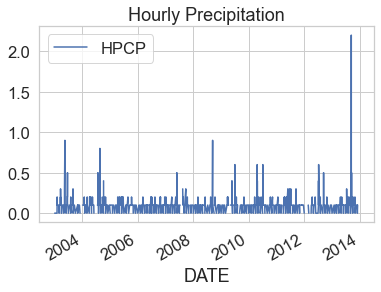

In [61]:
boulder_precip_2003_2013.plot(y="HPCP",
                              title="Hourly Precipitation")
plt.show()

In [62]:
# Subset data from 2005
precip_2005 = boulder_precip_2003_2013['2005']
precip_2005.head()

,STATION,STATION_NAME,ELEVATION,LATITUDE,LONGITUDE,HPCP,Measurement Flag,Quality Flag
DATE,,,,,,,,
2005-01-01 01:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.0,g,
2005-01-02 06:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,{,
2005-01-02 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,NaN,},
2005-01-05 08:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,
2005-01-12 04:00:00,COOP:050843,BOULDER 2 CO US,1650.5,40.03389,-105.28111,0.1,,


In [63]:
# Remove missing data values
precip_2005_clean = precip_2005.dropna()

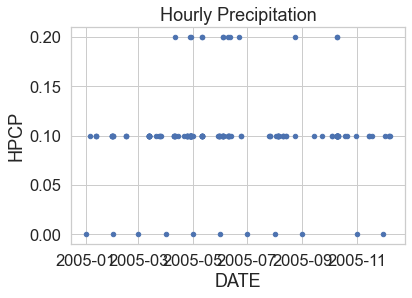

In [64]:
# Plot the data using pandas

precip_2005_clean.reset_index().plot(x="DATE",
                                     y="HPCP",
                                     title="Hourly Precipitation",
                                     kind="scatter")
plt.show()

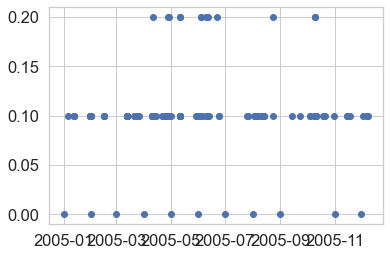

In [65]:
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_clean.index.values,
           y=precip_2005_clean["HPCP"])
plt.show()

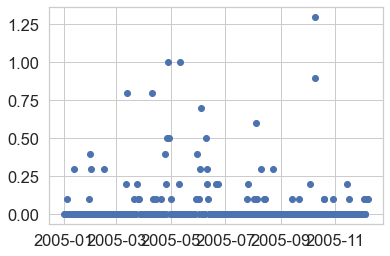

In [69]:
#When you resample data, you need to also tell Python how you wish to summarize the data for that time period.
#For example do you want to summarize or add all all values for each day?"
precip_2005_clean.resample("D").sum()

#or do you want a max value:

precip_2005_clean.resample("D").max()


precip_2005_daily = precip_2005_clean.resample("D").sum()
# Plot the data using native matplotlib
f, ax = plt.subplots()
ax.scatter(x=precip_2005_daily.index.values,
           y=precip_2005_daily["HPCP"])
plt.show()

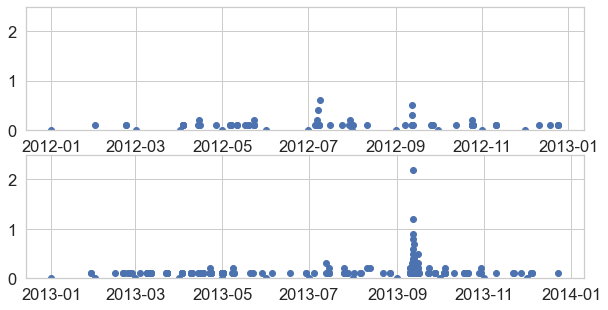

STATION                 COOP:050843
STATION_NAME        BOULDER 2 CO US
ELEVATION                    1650.5
LATITUDE                    40.0338
LONGITUDE                  -105.281
HPCP                            2.2
Measurement Flag                  g
Quality Flag                       
dtype: object

In [83]:
# Challenge 2: Plot Multiple Axes

precip_2012 = boulder_precip_2003_2013['2012']
precip_2012.head()

# Remove missing data values
precip_2012_clean = precip_2012.dropna()


precip_2013 = boulder_precip_2003_2013['2013']
precip_2013.head()

# Remove missing data values
precip_2013_clean = precip_2013.dropna()


#Challenge 3: Modify Plot x and y Limits


# Plot the data using native matplotlib
f, (ax1, ax2) = plt.subplots(2,1)
ax1.set(ylim=[0, 2.5])
ax2.set(ylim=[0, 2.5])
ax1.scatter(x=precip_2012_clean.index.values,
           y=precip_2012_clean["HPCP"])
ax2.scatter(x=precip_2013_clean.index.values,
           y=precip_2013_clean["HPCP"])
#set graphs larger
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()



precip_2012_clean.max()
precip_2013_clean.max()

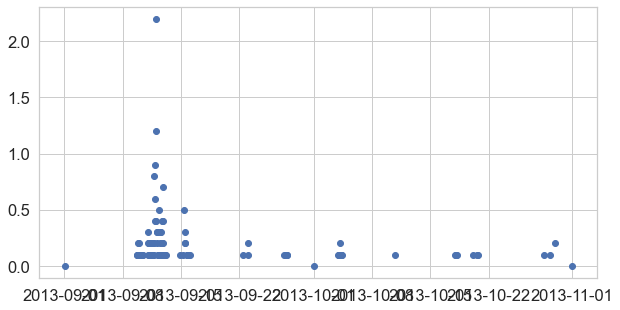

In [88]:
# Challenge 4: Data Subsets

precip_2013_clean_period = precip_2013_clean['2013-09-01':'2013-11-01']
f, ax = plt.subplots()
ax.scatter(x=precip_2013_clean_period.index.values,
           y=precip_2013_clean_period["HPCP"])
#set graphs larger
plt.rcParams['figure.figsize'] = [10, 5]
plt.show()

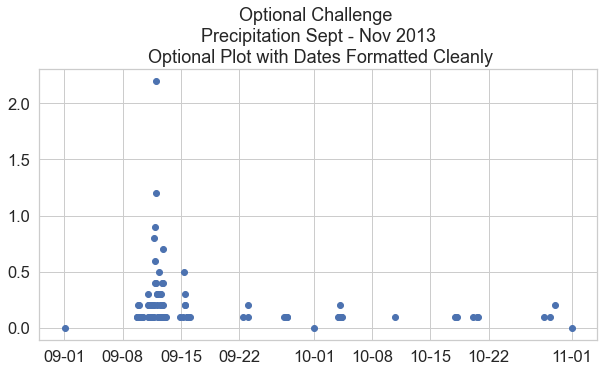

In [89]:
# Bonus Challenge: Formatting Dates on the X-Axis


from matplotlib.dates import DateFormatter

# Place your code to plot your data here
precip_2013_clean_period = precip_2013_clean['2013-09-01':'2013-11-01']
f, ax = plt.subplots()
ax.scatter(x=precip_2013_clean_period.index.values,
           y=precip_2013_clean_period["HPCP"])

# Define the date format
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.set(title="Optional Challenge \n Precipitation Sept - Nov 2013 \n Optional Plot with Dates Formatted Cleanly")
plt.show()